<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/%EC%A4%91%EA%B8%89/15%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

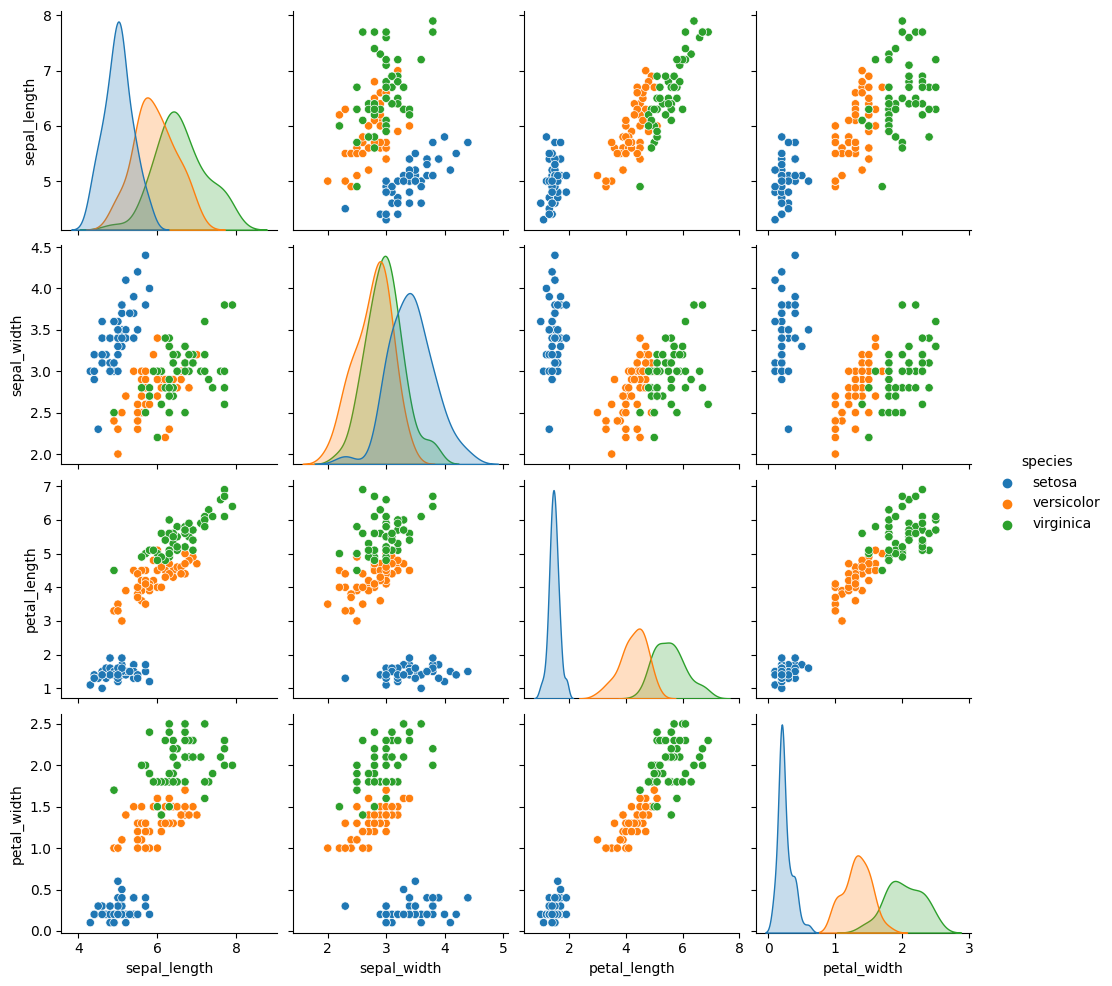

In [3]:
sns.pairplot(iris, hue='species')

In [4]:
import pandas as pd

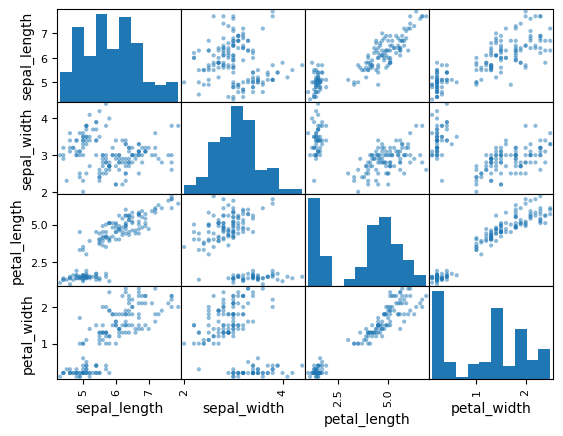

In [5]:
pd.plotting.scatter_matrix(iris);

In [8]:
data = pd.read_csv('sample_data/AirPassengers.csv', parse_dates=[0], index_col=[0])

In [9]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

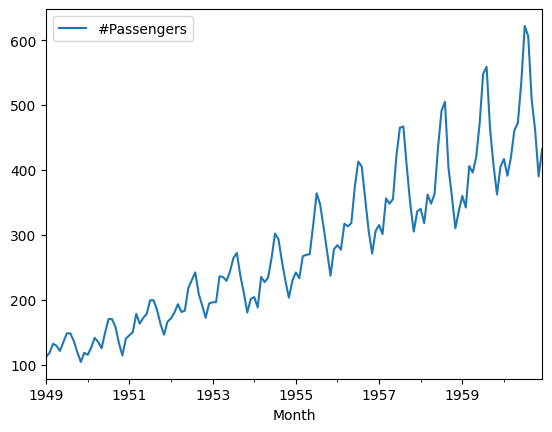

In [10]:
data.plot()

In [11]:
train = data.iloc[:int(len(data)*0.8)]

In [12]:
test = data.iloc[int(len(data)*0.8):]

In [13]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-03-01,362
1958-04-01,348
1958-05-01,363


In [14]:
test

,#Passengers
Month,
1958-08-01,505
1958-09-01,404
1958-10-01,359
1958-11-01,310
1958-12-01,337
1959-01-01,360
1959-02-01,342
1959-03-01,406
1959-04-01,396


# average

In [15]:
test['mean_forecast'] = train['#Passengers'].mean()

<ipython-input-15-c430aa4aacec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['mean_forecast'] = train['#Passengers'].mean()


In [16]:
import matplotlib.pyplot as plt

<Axes: xlabel='Month'>

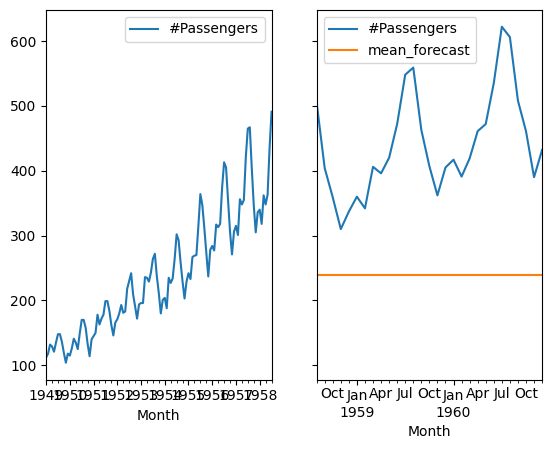

In [17]:
fig, ax = plt.subplots(1,2, sharey=True)
train.plot(ax=ax[0])
test.plot(ax=ax[1])

# naive

In [18]:
test['naive_forecast'] = train['#Passengers'].iloc[-1]

<ipython-input-18-742ff5d89f5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_forecast'] = train['#Passengers'].iloc[-1]


<Axes: xlabel='Month'>

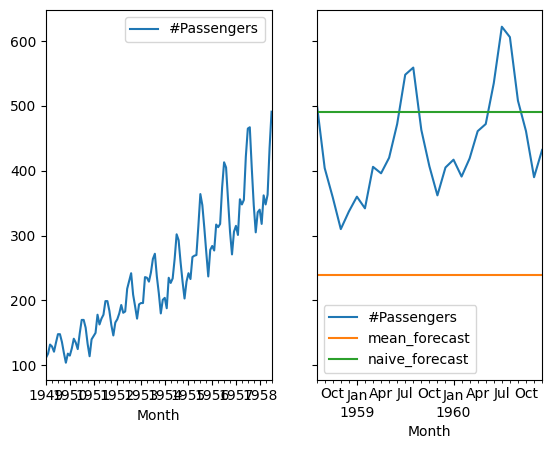

In [19]:
fig, ax = plt.subplots(1,2, sharey=True)
train.plot(ax=ax[0])
test.plot(ax=ax[1])

# seasonal naive

In [20]:
train['month'] = train.index.month
test['month'] = test.index.month

<ipython-input-20-78952a5974a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month'] = train.index.month
<ipython-input-20-78952a5974a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['month'] = test.index.month


In [21]:
train

,#Passengers,month
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5
...,...,...
1958-03-01,362,3
1958-04-01,348,4
1958-05-01,363,5


In [22]:
sn = train.loc['1957-08':]

In [23]:
sn.set_index('month', inplace=True)

In [24]:
sn

,#Passengers
month,
8,467
9,404
10,347
11,305
12,336
1,340
2,318
3,362
4,348


In [25]:
sn.loc[8].values[0]

467

In [26]:
test.month.map(lambda x: sn.loc[x].values[0])

Month
1958-08-01    467
1958-09-01    404
1958-10-01    347
1958-11-01    305
1958-12-01    336
1959-01-01    340
1959-02-01    318
1959-03-01    362
1959-04-01    348
1959-05-01    363
1959-06-01    435
1959-07-01    491
1959-08-01    467
1959-09-01    404
1959-10-01    347
1959-11-01    305
1959-12-01    336
1960-01-01    340
1960-02-01    318
1960-03-01    362
1960-04-01    348
1960-05-01    363
1960-06-01    435
1960-07-01    491
1960-08-01    467
1960-09-01    404
1960-10-01    347
1960-11-01    305
1960-12-01    336
Name: month, dtype: int64

In [27]:
test['seasonal_naive'] = test.month.map(lambda x: sn.loc[x].values[0])

<ipython-input-27-8d6368c5d586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['seasonal_naive'] = test.month.map(lambda x: sn.loc[x].values[0])


<Axes: xlabel='Month'>

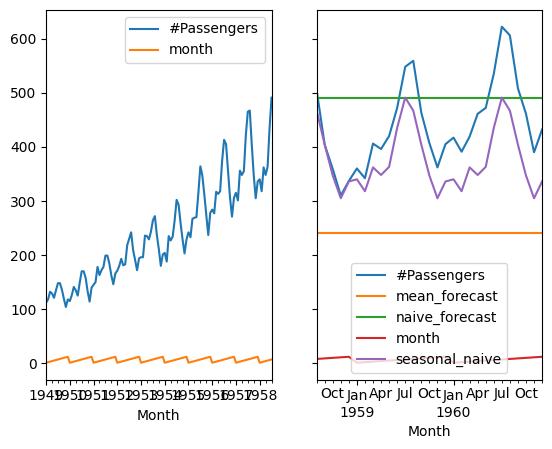

In [28]:
fig, ax = plt.subplots(1,2, sharey=True)
train.plot(ax=ax[0])
test.plot(ax=ax[1])

In [29]:
train['#Passengers'].iloc[0]

112

In [30]:
train['#Passengers'].iloc[-1]

491

In [31]:
test['h'] = range(len(test))

<ipython-input-31-4431689e8131>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['h'] = range(len(test))


In [32]:
test['drift'] = train['#Passengers'].iloc[-1] + (train['#Passengers'].iloc[-1] - train['#Passengers'].iloc[0]) / (len(train) - 1) * test['h']

<ipython-input-32-08174d9f485e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['drift'] = train['#Passengers'].iloc[-1] + (train['#Passengers'].iloc[-1] - train['#Passengers'].iloc[0]) / (len(train) - 1) * test['h']


In [33]:
test

,#Passengers,mean_forecast,naive_forecast,month,seasonal_naive,h,drift
Month,,,,,,,
1958-08-01,505,239.947826,491,8,467,0,491.000000
1958-09-01,404,239.947826,491,9,404,1,494.324561
1958-10-01,359,239.947826,491,10,347,2,497.649123
1958-11-01,310,239.947826,491,11,305,3,500.973684
1958-12-01,337,239.947826,491,12,336,4,504.298246
1959-01-01,360,239.947826,491,1,340,5,507.622807
1959-02-01,342,239.947826,491,2,318,6,510.947368
1959-03-01,406,239.947826,491,3,362,7,514.271930
1959-04-01,396,239.947826,491,4,348,8,517.596491


<Axes: xlabel='Month'>

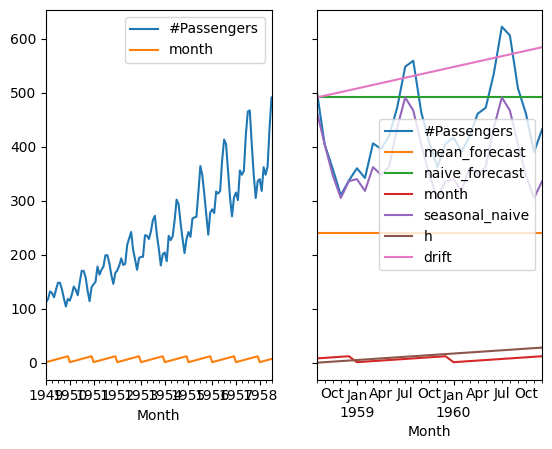

In [34]:
fig, ax = plt.subplots(1,2, sharey=True)
train.plot(ax=ax[0])
test.plot(ax=ax[1])

#

In [35]:
import statsmodels.api as sm

# scikit-learn가 다름!!!!!!!

In [36]:
model = sm.tsa.SimpleExpSmoothing(train['#Passengers'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
vars(model)

{'data': <statsmodels.base.data.PandasData at 0x782ca0ee2350>,
 'k_constant': 0,
 'exog': None,
 'endog': array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
        126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
        178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
        181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
        229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
        264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
        364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
        405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
        404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491]),
 '_data_attr': ['exog',
  'endog',
  'data.exog',
  'data.endog',
  'data.orig_endog',
  'data.orig_exog'],
 '_init_keys': [],
 '_index': DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
                '1949-05-01', '1949-0

In [38]:
model.fit() # 좋지 않음

In [39]:
vars(model)

{'data': <statsmodels.base.data.PandasData at 0x782ca0ee2350>,
 'k_constant': 0,
 'exog': None,
 'endog': array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
        126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
        178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
        181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
        229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
        264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
        364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
        405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
        404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491]),
 '_data_attr': ['exog',
  'endog',
  'data.exog',
  'data.endog',
  'data.orig_endog',
  'data.orig_exog'],
 '_init_keys': [],
 '_index': DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
                '1949-05-01', '1949-0

In [40]:
test.index

DatetimeIndex(['1958-08-01', '1958-09-01', '1958-10-01', '1958-11-01',
               '1958-12-01', '1959-01-01', '1959-02-01', '1959-03-01',
               '1959-04-01', '1959-05-01', '1959-06-01', '1959-07-01',
               '1959-08-01', '1959-09-01', '1959-10-01', '1959-11-01',
               '1959-12-01', '1960-01-01', '1960-02-01', '1960-03-01',
               '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01',
               '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01',
               '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [41]:
model.predict(test.index) # 좋지 않음

TypeError: ignored

In [42]:
model.predict(test.index[0])

TypeError: ignored

In [43]:
model.predict(model.params) # 좋지 않음

array([490.71819813])

# fit의 결과물이 model에 귀속되는게 아님! 새로운 결과로 할당되기 때문에 새롭게 할당

In [45]:
x = model.fit()

In [46]:
x.summary()

Dep. Variable:,#Passengers,No. Observations:,115
Model:,SimpleExpSmoothing,SSE,82833.260
Optimized:,True,AIC,760.660
Trend:,None,BIC,766.150
Seasonal:,None,AICC,761.024
Seasonal Periods:,None,Date:,"Sat, 22 Jul 2023"
Box-Cox:,False,Time:,05:08:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,112.00000,l.0,True


In [47]:
train.index[0]

Timestamp('1949-01-01 00:00:00')

In [48]:
x.predict(train.index[0])

1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    117.970000
1949-04-01    131.929850
1949-05-01    129.014649
                 ...    
1958-03-01    318.109896
1958-04-01    361.780549
1958-05-01    348.068903
1958-06-01    362.925345
1958-07-01    434.639627
Freq: MS, Length: 115, dtype: float64

In [49]:
x.predict(train.index[-1])

1958-07-01    434.639627
Freq: MS, dtype: float64

In [50]:
x.forecast(3)

1958-08-01    490.718198
1958-09-01    490.718198
1958-10-01    490.718198
Freq: MS, dtype: float64

In [51]:
x.forecast(len(test)).values

array([490.71819813, 490.71819813, 490.71819813, 490.71819813,
       490.71819813, 490.71819813, 490.71819813, 490.71819813,
       490.71819813, 490.71819813, 490.71819813, 490.71819813,
       490.71819813, 490.71819813, 490.71819813, 490.71819813,
       490.71819813, 490.71819813, 490.71819813, 490.71819813,
       490.71819813, 490.71819813, 490.71819813, 490.71819813,
       490.71819813, 490.71819813, 490.71819813, 490.71819813,
       490.71819813])

In [52]:
test['simple_ex'] = x.forecast(len(test)).values

<ipython-input-52-71e346521390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['simple_ex'] = x.forecast(len(test)).values


In [53]:
model2 = sm.tsa.Holt(train['#Passengers'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
x2 = model2.fit()

In [55]:
test['holt_ex'] = x2.forecast(len(test)).values

<ipython-input-55-da74bfe11b1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['holt_ex'] = x2.forecast(len(test)).values


In [56]:
model3 = sm.tsa.Holt(train['#Passengers'], damped_trend=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
x3 = model3.fit()

In [58]:
test['holt_ex_damp'] = x3.forecast(len(test)).values

<ipython-input-58-3560b8a5d5bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['holt_ex_damp'] = x3.forecast(len(test)).values


In [58]:
# h-w

# plotly

In [59]:
import plotly.graph_objects as go

In [60]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train['#Passengers'], name='Train'))
fig.add_trace(go.Scatter(x=test.index, y=test['#Passengers'], name='Test'))

fig.add_trace(go.Scatter(x=test.index, y=test['drift'], name='Drift'))
fig.add_trace(go.Scatter(x=test.index, y=test['holt_ex'], name='Holt Ex'))
fig.add_trace(go.Scatter(x=test.index, y=test['holt_ex_damp'], name='Holt Ex Damp'))
# mean
fig.add_trace(go.Scatter(x=test.index, y=test['mean_forecast'], name='Mean'))
## weighted
fig.add_trace(go.Scatter(x=test.index, y=test['simple_ex'], name='Simple Ex'))

# naive
fig.add_trace(go.Scatter(x=test.index, y=test['naive_forecast'], name='Naive'))
fig.add_trace(go.Scatter(x=test.index, y=test['seasonal_naive'], name='Seasonal Naive'))